In [3]:
!pip install pandas_profiling
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import keras.backend as K
from pandas_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=18f1575b955274c75da0dbeec2fef1f33171988eebecc678ea64b08d59129355
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.

<ipython-input-3-915899ca0651>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [151]:
data=pd.read_csv("solar power.csv")
data.head(5)

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


In [152]:
timestamp=data.pop("Timestamp")
data_stationary=data.copy()
for column in data_stationary.columns:
  data_stationary[column]=data_stationary[column].diff(1).dropna()
data_stationary

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.084808,-1.321270,1.333334,-34.105212,2.929440,0.087840,-0.105680,0.331840,0.298920,-0.035392,0.088496,0.001172,0.568800
2,-0.147400,-0.421688,1.000000,-43.874252,-14.953120,-0.509416,-0.474392,-0.490072,-0.650640,-0.456936,-0.079312,-0.000540,-0.468840
3,0.236440,1.010994,-2.866667,25.583692,0.734560,3.602896,3.408840,3.118880,3.163816,3.497120,0.540344,-0.000989,2.819360
4,0.205636,-1.335962,2.266667,-64.263440,-22.187200,0.193280,0.141200,0.017400,-0.035416,0.193520,-0.227448,0.000632,-1.169280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.192752,0.590428,0.000000,24.613078,-0.100891,-0.007350,-0.011440,-0.014640,0.003170,0.002094,0.008239,0.000091,0.044742
1005,-0.244026,-0.881052,0.000000,298.748932,-0.100892,-0.077758,-0.059550,-0.080620,-0.063886,-0.065918,0.007233,0.000000,0.039046
1006,-0.109798,-0.004984,0.000000,-305.125088,-0.102661,-0.056720,-0.035494,-0.047092,-0.033528,-0.037648,0.001038,0.000000,0.005602
1007,-0.068800,0.879444,0.000000,174.957148,-0.049560,-0.057792,-0.035562,-0.070160,-0.047122,-0.037742,-0.002076,-0.000180,-0.011714


In [153]:
data_stationary=data_stationary.dropna()
data_stationary

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
1,0.084808,-1.321270,1.333334,-34.105212,2.929440,0.087840,-0.105680,0.331840,0.298920,-0.035392,0.088496,0.001172,0.568800
2,-0.147400,-0.421688,1.000000,-43.874252,-14.953120,-0.509416,-0.474392,-0.490072,-0.650640,-0.456936,-0.079312,-0.000540,-0.468840
3,0.236440,1.010994,-2.866667,25.583692,0.734560,3.602896,3.408840,3.118880,3.163816,3.497120,0.540344,-0.000989,2.819360
4,0.205636,-1.335962,2.266667,-64.263440,-22.187200,0.193280,0.141200,0.017400,-0.035416,0.193520,-0.227448,0.000632,-1.169280
5,-0.043048,1.033948,-1.066667,298.030852,-5.318920,-0.210720,0.070344,0.158920,0.052872,0.193064,-0.103392,-0.001352,-0.663400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-0.192752,0.590428,0.000000,24.613078,-0.100891,-0.007350,-0.011440,-0.014640,0.003170,0.002094,0.008239,0.000091,0.044742
1005,-0.244026,-0.881052,0.000000,298.748932,-0.100892,-0.077758,-0.059550,-0.080620,-0.063886,-0.065918,0.007233,0.000000,0.039046
1006,-0.109798,-0.004984,0.000000,-305.125088,-0.102661,-0.056720,-0.035494,-0.047092,-0.033528,-0.037648,0.001038,0.000000,0.005602
1007,-0.068800,0.879444,0.000000,174.957148,-0.049560,-0.057792,-0.035562,-0.070160,-0.047122,-0.037742,-0.002076,-0.000180,-0.011714


In [154]:
data

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,43.349172,12.790256,0.533333,118.786620,707.533840,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.145720
1,43.433980,11.468986,1.866667,84.681408,710.463280,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.714520
2,43.286580,11.047298,2.866667,40.807156,695.510160,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.245680
3,43.523020,12.058292,0.000000,66.390848,696.244720,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.065040
4,43.728656,10.722330,2.266667,2.127408,674.057520,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.895760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,16.580318,43.276824,0.000000,49.674388,-0.243156,23.969398,25.226270,24.800780,24.674114,24.832156,2.833721,5.398601,15.298130
1005,16.336292,42.395772,0.000000,348.423320,-0.344048,23.891640,25.166720,24.720160,24.610228,24.766238,2.840954,5.398601,15.337176
1006,16.226494,42.390788,0.000000,43.298232,-0.446709,23.834920,25.131226,24.673068,24.576700,24.728590,2.841992,5.398601,15.342778
1007,16.157694,43.270232,0.000000,218.255380,-0.496269,23.777128,25.095664,24.602908,24.529578,24.690848,2.839916,5.398421,15.331064


In [155]:
data.isnull().sum()

Air_Temp             0
Relative_Humidity    0
Wind_Speed           0
Wind_Direction       0
Solar_Radiation      0
RTD_1                0
RTD_2                0
RTD_3                0
RTD_4                0
RTD_5                0
Array_Voltage        0
Array_Current        0
Power_Generated      0
dtype: int64

In [65]:
#fig,ax=plt.subplots(figsize=(10,8))
correlation=data.corr()
correlation

#sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)


,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
Air_Temp,1.000000,-0.881522,0.553201,0.332521,0.926546,0.947060,0.939768,0.941827,0.942763,0.944076,0.820737,-0.954264,0.818539
Relative_Humidity,-0.881522,1.000000,-0.527177,-0.269776,-0.685155,-0.834347,-0.842189,-0.841937,-0.836790,-0.837487,-0.748393,0.953650,-0.746166
Wind_Speed,0.553201,-0.527177,1.000000,0.197639,0.538768,0.601840,0.604302,0.602146,0.601604,0.601290,0.481086,-0.537450,0.479723
Wind_Direction,0.332521,-0.269776,0.197639,1.000000,0.337300,0.317677,0.309743,0.312000,0.314743,0.316612,0.237368,-0.286299,0.236458
Solar_Radiation,0.926546,-0.685155,0.538768,0.337300,1.000000,0.915295,0.901310,0.905277,0.909054,0.909236,0.732484,-0.820339,0.730455
RTD_1,0.947060,-0.834347,0.601840,0.317677,0.915295,1.000000,0.998383,0.998348,0.998685,0.998965,0.805599,-0.924697,0.803235
RTD_2,0.939768,-0.842189,0.604302,0.309743,0.901310,0.998383,1.000000,0.999661,0.998975,0.998550,0.803121,-0.926478,0.800739
RTD_3,0.941827,-0.841937,0.602146,0.312000,0.905277,0.998348,0.999661,1.000000,0.998783,0.998309,0.803007,-0.928012,0.800618
RTD_4,0.942763,-0.836790,0.601604,0.314743,0.909054,0.998685,0.998975,0.998783,1.000000,0.999572,0.809187,-0.923945,0.806862
RTD_5,0.944076,-0.837487,0.601290,0.316612,0.909236,0.998965,0.998550,0.998309,0.999572,1.000000,0.811188,-0.924514,0.808869


In [35]:
profile = ProfileReport(data, tsmode=True)
profile.to_file('profile_report2.html')

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [156]:
X_list,Y_list=[],[]

for column in data.columns:
  if column != "Power_Generated":
    X_list.append(column)
  else:
    Y_list.append(column)


In [157]:
X_list

['Air_Temp',
 'Relative_Humidity',
 'Wind_Speed',
 'Wind_Direction',
 'Solar_Radiation',
 'RTD_1',
 'RTD_2',
 'RTD_3',
 'RTD_4',
 'RTD_5',
 'Array_Voltage',
 'Array_Current']

In [158]:
Y_list

['Power_Generated']

In [159]:
X=data[X_list]
X

,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current
0,43.349172,12.790256,0.533333,118.786620,707.533840,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869
1,43.433980,11.468986,1.866667,84.681408,710.463280,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041
2,43.286580,11.047298,2.866667,40.807156,695.510160,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501
3,43.523020,12.058292,0.000000,66.390848,696.244720,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512
4,43.728656,10.722330,2.266667,2.127408,674.057520,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,16.580318,43.276824,0.000000,49.674388,-0.243156,23.969398,25.226270,24.800780,24.674114,24.832156,2.833721,5.398601
1005,16.336292,42.395772,0.000000,348.423320,-0.344048,23.891640,25.166720,24.720160,24.610228,24.766238,2.840954,5.398601
1006,16.226494,42.390788,0.000000,43.298232,-0.446709,23.834920,25.131226,24.673068,24.576700,24.728590,2.841992,5.398601
1007,16.157694,43.270232,0.000000,218.255380,-0.496269,23.777128,25.095664,24.602908,24.529578,24.690848,2.839916,5.398421


In [160]:
Y=data[Y_list]
Y

,Power_Generated
0,430.145720
1,430.714520
2,430.245680
3,433.065040
4,431.895760
...,...
1004,15.298130
1005,15.337176
1006,15.342778
1007,15.331064


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variable


In [161]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [162]:
X_train.shape

(807, 12)

In [73]:
tf.random.set_seed(42)

def chooseModel(modelName):
  model = tf.keras.models.Sequential()

  if modelName == "BiLSTM":
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300,activation='relu',return_sequences=True,input_shape=(12,1))))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,activation='relu',return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation='relu')))
    model.add(tf.keras.layers.Dense(1))

  elif modelName == "SimpleRNN":
    model.add(tf.keras.layers.SimpleRNN(300, input_shape=(12,1), activation='relu',return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(200,activation='relu',return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(50,activation='relu'))
    model.add(tf.keras.layers.Dense(1))

  elif modelName == "BiRNN":
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(300, input_shape=(12,1), activation='relu',return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(200,activation='relu',return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(50,activation='relu')))
    model.add(tf.keras.layers.Dense(1))

  elif modelName == "CNN":
    model.add(tf.keras.layers.Conv1D(300, kernel_size=6, activation='relu', input_shape=(12,1))),
    model.add(tf.keras.layers.MaxPooling1D(2)),
    model.add(tf.keras.layers.Conv1D(200, kernel_size=3, activation='relu',padding="same")),
    model.add(tf.keras.layers.MaxPooling1D(2)),
    model.add(tf.keras.layers.Conv1D(50, kernel_size=3, activation='relu',padding="same")),
    model.add(tf.keras.layers.MaxPooling1D(1)),
    model.add(tf.keras.layers.Flatten()),
    model.add(tf.keras.layers.Dense(132)),
    model.add(tf.keras.layers.Dropout(0.3)),

    model.add(tf.keras.layers.Dense(1))

  model.compile(loss = "mse",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mse"])

  return model


In [74]:
%%time
biLSTM=chooseModel("BiLSTM")
history = biLSTM.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
26/26 [==============================] - 19s 329ms/step - loss: 25679.3828 - mse: 25679.3828 - val_loss: 5582.1870 - val_mse: 5582.1870
Epoch 2/15
26/26 [==============================] - 7s 251ms/step - loss: 23970.9863 - mse: 23970.9863 - val_loss: 16266.7168 - val_mse: 16266.7168
Epoch 3/15
26/26 [==============================] - 8s 304ms/step - loss: 37012.1953 - mse: 37012.1953 - val_loss: 4812.6919 - val_mse: 4812.6919
Epoch 4/15
26/26 [==============================] - 7s 276ms/step - loss: 12279.7617 - mse: 12279.7617 - val_loss: 5071.1763 - val_mse: 5071.1763
Epoch 5/15
26/26 [==============================] - 7s 266ms/step - loss: 7316.9561 - mse: 7316.9561 - val_loss: 4767.3755 - val_mse: 4767.3755
Epoch 6/15
26/26 [==============================] - 8s 304ms/step - loss: 137578.3438 - mse: 137578.3438 - val_loss: 30424.9883 - val_mse: 30424.9883
Epoch 7/15
26/26 [==============================] - 7s 252ms/step - loss: 286757.7812 - mse: 286757.7812 - val_loss: 13

In [ ]:
%%time
simpleRNN=chooseModel("SimpleRNN")
history = simpleRNN.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
26/26 [==============================] - 5s 53ms/step - loss: 20406.6016 - mse: 20406.6016 - val_loss: 7021.7754 - val_mse: 7021.7754
Epoch 2/15
26/26 [==============================] - 2s 71ms/step - loss: 5280.3428 - mse: 5280.3428 - val_loss: 2946.0417 - val_mse: 2946.0417
Epoch 3/15
26/26 [==============================] - 2s 57ms/step - loss: 2524.0706 - mse: 2524.0706 - val_loss: 1549.4958 - val_mse: 1549.4958
Epoch 4/15
26/26 [==============================] - 1s 41ms/step - loss: 1576.5750 - mse: 1576.5750 - val_loss: 447.0253 - val_mse: 447.0253
Epoch 5/15
26/26 [==============================] - 1s 43ms/step - loss: 402.3295 - mse: 402.3295 - val_loss: 277.6868 - val_mse: 277.6868
Epoch 6/15
26/26 [==============================] - 1s 41ms/step - loss: 164.0014 - mse: 164.0014 - val_loss: 6.8137 - val_mse: 6.8137
Epoch 7/15
26/26 [==============================] - 1s 40ms/step - loss: 41.8495 - mse: 41.8495 - val_loss: 2.4871 - val_mse: 2.4871
Epoch 8/15
26/26 [===

In [ ]:
%%time
biRNN=chooseModel("BiRNN")
history = biRNN.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
26/26 [==============================] - 10s 158ms/step - loss: 13927.8252 - mse: 13927.8252 - val_loss: 2589.3279 - val_mse: 2589.3279
Epoch 2/15
26/26 [==============================] - 2s 77ms/step - loss: 1482.9319 - mse: 1482.9319 - val_loss: 170.8132 - val_mse: 170.8132
Epoch 3/15
26/26 [==============================] - 2s 79ms/step - loss: 1273.2432 - mse: 1273.2432 - val_loss: 209.2872 - val_mse: 209.2872
Epoch 4/15
26/26 [==============================] - 2s 76ms/step - loss: 348.3318 - mse: 348.3318 - val_loss: 121.4124 - val_mse: 121.4124
Epoch 5/15
26/26 [==============================] - 2s 77ms/step - loss: 188.3814 - mse: 188.3814 - val_loss: 40.0587 - val_mse: 40.0587
Epoch 6/15
26/26 [==============================] - 3s 116ms/step - loss: 25.2337 - mse: 25.2337 - val_loss: 30.3319 - val_mse: 30.3319
Epoch 7/15
26/26 [==============================] - 2s 82ms/step - loss: 10.1502 - mse: 10.1502 - val_loss: 28.3054 - val_mse: 28.3054
Epoch 8/15
26/26 [======

In [ ]:
%%time
CNN=chooseModel('CNN')
history = CNN.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=15,validation_data=(X_test,Y_test))


Epoch 1/15
26/26 [==============================] - 3s 19ms/step - loss: 25532.5352 - mse: 25532.5352 - val_loss: 9920.2236 - val_mse: 9920.2236
Epoch 2/15
26/26 [==============================] - 0s 9ms/step - loss: 11379.9648 - mse: 11379.9648 - val_loss: 9997.7607 - val_mse: 9997.7607
Epoch 3/15
26/26 [==============================] - 0s 10ms/step - loss: 6467.8662 - mse: 6467.8662 - val_loss: 5449.4810 - val_mse: 5449.4810
Epoch 4/15
26/26 [==============================] - 0s 10ms/step - loss: 5108.2388 - mse: 5108.2388 - val_loss: 3851.9065 - val_mse: 3851.9065
Epoch 5/15
26/26 [==============================] - 0s 10ms/step - loss: 4031.7295 - mse: 4031.7295 - val_loss: 2943.8867 - val_mse: 2943.8867
Epoch 6/15
26/26 [==============================] - 0s 11ms/step - loss: 3104.7812 - mse: 3104.7812 - val_loss: 2528.1589 - val_mse: 2528.1592
Epoch 7/15
26/26 [==============================] - 0s 10ms/step - loss: 2471.1787 - mse: 2471.1787 - val_loss: 3499.9321 - val_mse: 3499.9

In [ ]:
Y_test

,Power_Generated
807,276.918640
808,276.217980
809,276.219600
810,275.839240
811,275.737860
...,...
1004,15.298130
1005,15.337176
1006,15.342778
1007,15.331064


<Axes: >

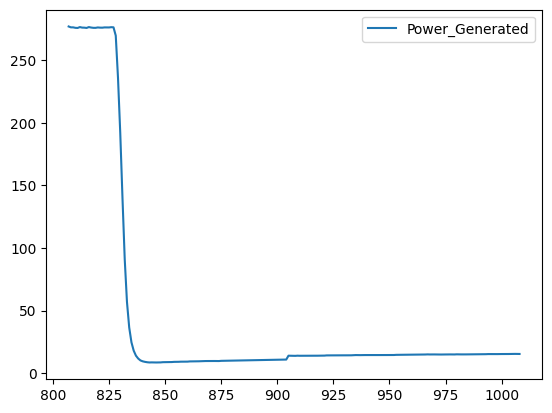

In [ ]:
Y_test.plot()

In [ ]:
bilstm_prediction = biLSTM.predict(X_test)
simpleRNN_prediction = simpleRNN.predict(X_test)
biRNN_prediction = biRNN.predict(X_test)
CNN_prediction=CNN.predict(X_test)

7/7 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'CNN prediction')

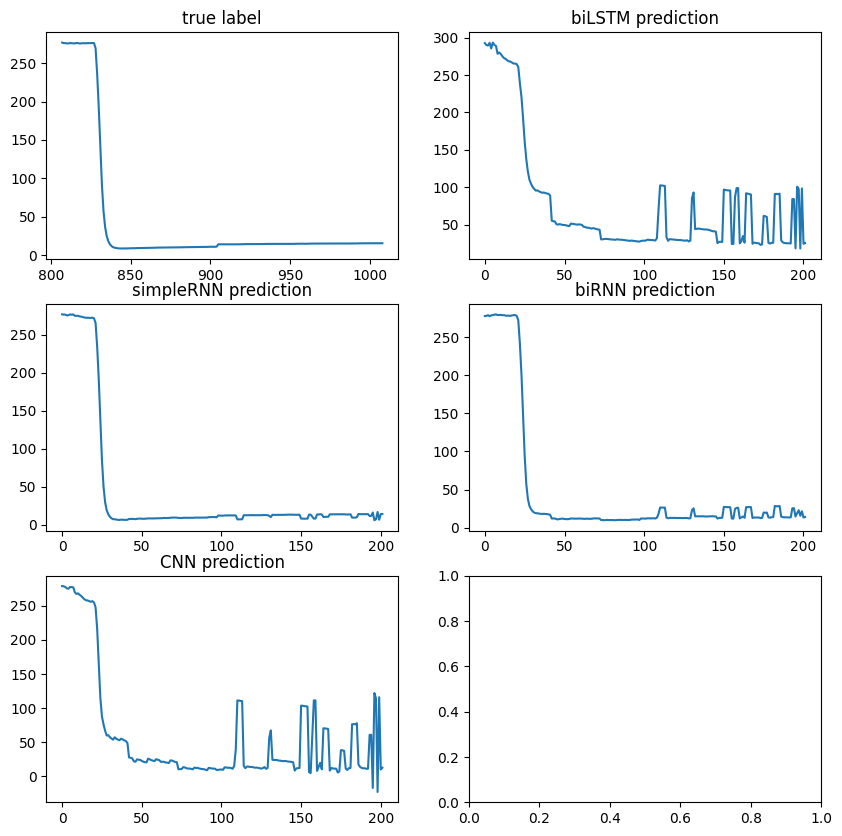

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(10,10))

ax[0,0].plot(Y_test)
ax[0,0].set_title('true label')

ax[0, 1].plot(bilstm_prediction)
ax[0, 1].set_title('biLSTM prediction')

ax[1, 0].plot(simpleRNN_prediction)
ax[1, 0].set_title('simpleRNN prediction')

ax[1, 1].plot(biRNN_prediction)
ax[1, 1].set_title('biRNN prediction')

ax[2, 0].plot(CNN_prediction)
ax[2, 0].set_title('CNN prediction')

##Convert non stationary data to stationary

In [99]:
X2=data_stationary[X_list]
Y2=data_stationary[Y_list]

X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.2,shuffle=False)

In [100]:
X_train2.shape

(806, 12)

In [101]:
%%time
biLSTM=chooseModel("BiLSTM")
history = biLSTM.fit(tf.expand_dims(X_train2,axis=-1),Y_train2, epochs=15,validation_data=(X_test2,Y_test2))

Epoch 1/15
26/26 [==============================] - 17s 293ms/step - loss: 82.7044 - mse: 82.7044 - val_loss: 52.1329 - val_mse: 52.1329
Epoch 2/15
26/26 [==============================] - 8s 305ms/step - loss: 57.4220 - mse: 57.4220 - val_loss: 49.4761 - val_mse: 49.4761
Epoch 3/15
26/26 [==============================] - 7s 289ms/step - loss: 67.7840 - mse: 67.7840 - val_loss: 49.4814 - val_mse: 49.4814
Epoch 4/15
26/26 [==============================] - 7s 260ms/step - loss: 258.1931 - mse: 258.1931 - val_loss: 112.1777 - val_mse: 112.1777
Epoch 5/15
26/26 [==============================] - 8s 309ms/step - loss: 349.0982 - mse: 349.0982 - val_loss: 49.3009 - val_mse: 49.3009
Epoch 6/15
26/26 [==============================] - 7s 264ms/step - loss: 43.0026 - mse: 43.0026 - val_loss: 48.7484 - val_mse: 48.7484
Epoch 7/15
26/26 [==============================] - 8s 308ms/step - loss: 50.7599 - mse: 50.7599 - val_loss: 47.3448 - val_mse: 47.3448
Epoch 8/15
26/26 [=======================

In [102]:
%%time
simpleRNN=chooseModel("SimpleRNN")
history = simpleRNN.fit(tf.expand_dims(X_train2,axis=-1),Y_train2, epochs=15,validation_data=(X_test2,Y_test2))

Epoch 1/15
26/26 [==============================] - 4s 55ms/step - loss: 69.1111 - mse: 69.1111 - val_loss: 42.6999 - val_mse: 42.6999
Epoch 2/15
26/26 [==============================] - 1s 45ms/step - loss: 43.4157 - mse: 43.4157 - val_loss: 33.4499 - val_mse: 33.4499
Epoch 3/15
26/26 [==============================] - 2s 78ms/step - loss: 29.9861 - mse: 29.9861 - val_loss: 27.1309 - val_mse: 27.1309
Epoch 4/15
26/26 [==============================] - 1s 45ms/step - loss: 42.5554 - mse: 42.5554 - val_loss: 25.0916 - val_mse: 25.0916
Epoch 5/15
26/26 [==============================] - 1s 40ms/step - loss: 16.1550 - mse: 16.1550 - val_loss: 10.6433 - val_mse: 10.6433
Epoch 6/15
26/26 [==============================] - 1s 42ms/step - loss: 8.2802 - mse: 8.2802 - val_loss: 5.7828 - val_mse: 5.7828
Epoch 7/15
26/26 [==============================] - 1s 38ms/step - loss: 2.9244 - mse: 2.9244 - val_loss: 0.5408 - val_mse: 0.5408
Epoch 8/15
26/26 [==============================] - 1s 39ms/ste

In [80]:
%%time
biRNN=chooseModel("BiRNN")
history = biRNN.fit(tf.expand_dims(X_train2,axis=-1),Y_train2, epochs=15,validation_data=(X_test2,Y_test2))

Epoch 1/15
26/26 [==============================] - 10s 118ms/step - loss: 78.7345 - mse: 78.7345 - val_loss: 43.2898 - val_mse: 43.2898
Epoch 2/15
26/26 [==============================] - 2s 90ms/step - loss: 49.6271 - mse: 49.6271 - val_loss: 37.0788 - val_mse: 37.0788
Epoch 3/15
26/26 [==============================] - 2s 89ms/step - loss: 32.9585 - mse: 32.9585 - val_loss: 13.2067 - val_mse: 13.2067
Epoch 4/15
26/26 [==============================] - 4s 139ms/step - loss: 22.9972 - mse: 22.9972 - val_loss: 2.5153 - val_mse: 2.5153
Epoch 5/15
26/26 [==============================] - 2s 90ms/step - loss: 13.7252 - mse: 13.7252 - val_loss: 19.3287 - val_mse: 19.3287
Epoch 6/15
26/26 [==============================] - 2s 90ms/step - loss: 14.9005 - mse: 14.9005 - val_loss: 3.3296 - val_mse: 3.3296
Epoch 7/15
26/26 [==============================] - 2s 90ms/step - loss: 7.9930 - mse: 7.9930 - val_loss: 7.5534 - val_mse: 7.5534
Epoch 8/15
26/26 [==============================] - 3s 97ms/

In [81]:
%%time
CNN=chooseModel('CNN')
history = CNN.fit(tf.expand_dims(X_train2,axis=-1),Y_train2, epochs=15,validation_data=(X_test2,Y_test2))

Epoch 1/15
26/26 [==============================] - 3s 47ms/step - loss: 77.7605 - mse: 77.7605 - val_loss: 49.4358 - val_mse: 49.4358
Epoch 2/15
26/26 [==============================] - 1s 28ms/step - loss: 74.2310 - mse: 74.2310 - val_loss: 49.0555 - val_mse: 49.0555
Epoch 3/15
26/26 [==============================] - 1s 22ms/step - loss: 70.3731 - mse: 70.3731 - val_loss: 50.4649 - val_mse: 50.4649
Epoch 4/15
26/26 [==============================] - 1s 22ms/step - loss: 59.7125 - mse: 59.7125 - val_loss: 42.7291 - val_mse: 42.7291
Epoch 5/15
26/26 [==============================] - 1s 21ms/step - loss: 41.6477 - mse: 41.6477 - val_loss: 34.5179 - val_mse: 34.5179
Epoch 6/15
26/26 [==============================] - 1s 22ms/step - loss: 43.4225 - mse: 43.4225 - val_loss: 35.3328 - val_mse: 35.3328
Epoch 7/15
26/26 [==============================] - 1s 21ms/step - loss: 45.8609 - mse: 45.8609 - val_loss: 24.9448 - val_mse: 24.9448
Epoch 8/15
26/26 [==============================] - 1s 

In [107]:
bilstm_prediction = biLSTM.predict(X_test2)
simpleRNN_prediction = simpleRNN.predict(X_test2)
biRNN_prediction = biRNN.predict(X_test2)
CNN_prediction=CNN.predict(X_test2)

7/7 [==============================] - 0s 3ms/step


In [103]:
#430.145720
data['Power_Generated'].iloc[0]

430.14572

In [128]:
df=pd.DataFrame(bilstm_prediction)
df

,0
0,-1.998231
1,-2.138018
2,-2.552257
3,2.430981
4,-5.566890
...,...
197,0.978874
198,2.703702
199,0.802239
200,1.309478


In [137]:
trueY_test=pd.DataFrame(data['Power_Generated'].iloc[807:])
trueY_test

,Power_Generated
807,276.918640
808,276.217980
809,276.219600
810,275.839240
811,275.737860
...,...
1004,15.298130
1005,15.337176
1006,15.342778
1007,15.331064


Text(0.5, 1.0, 'CNN prediction')

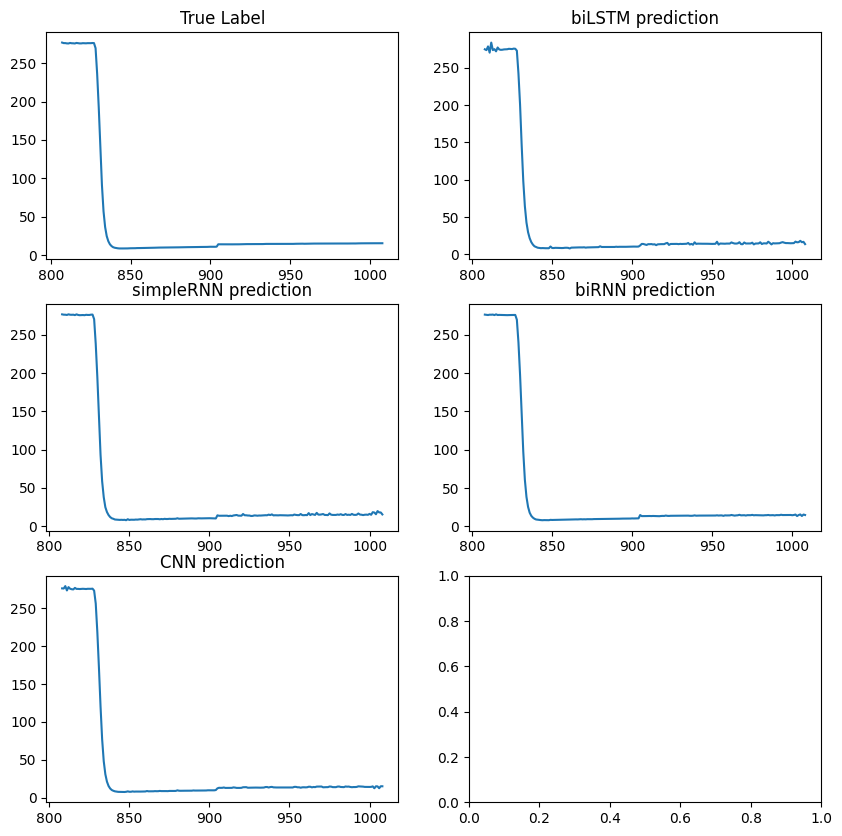

In [163]:
originalData= trueY_test.shift(1)

fig,ax = plt.subplots(3,2,figsize=(10,10))

ax[0, 0].plot(Y_test)
ax[0, 0].set_title('True Label')

ax[0, 1].plot(bilstm_prediction + originalData)
ax[0, 1].set_title('biLSTM prediction')

ax[1, 0].plot(simpleRNN_prediction + originalData)
ax[1, 0].set_title('simpleRNN prediction')

ax[1, 1].plot(biRNN_prediction + originalData)
ax[1, 1].set_title('biRNN prediction')

ax[2, 0].plot(CNN_prediction + originalData)
ax[2, 0].set_title('CNN prediction')

